In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
sns.set(style="whitegrid")


In [3]:
# load the data
df = pd.read_csv("C:/Users/mintesinot/10_acadamey/solar-challenge-week1/data/benin-malanville.csv", parse_dates=["Timestamp"])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
#Summary Statistics & Missing Value Report

# Summary statistics
df.describe()

# Missing value count
missing = df.isna().sum()
missing[missing > 0]  # Columns with missing values

# Percentage of nulls
percent_null = (df.isna().sum() / len(df)) * 100
percent_null[percent_null > 5]


Comments    100.0
dtype: float64

In [5]:
#Outlier Detection

# Z-score calculation
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = np.abs(stats.zscore(df[cols_to_check].dropna()))
outliers = (z_scores > 3).sum(axis=0)
print("Outlier count per column:\n", dict(zip(cols_to_check, outliers)))


Outlier count per column:
 {'GHI': np.int64(89), 'DNI': np.int64(0), 'DHI': np.int64(3738), 'ModA': np.int64(27), 'ModB': np.int64(63), 'WS': np.int64(3109), 'WSgust': np.int64(3500)}


In [6]:
#Cleaning

# Fill missing values with median
df_cleaned = df.copy()
for col in cols_to_check:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Save cleaned CSV
df_cleaned.to_csv("C:/Users/mintesinot/10_acadamey/solar-challenge-week1/data/benin-malanville_clean.csv", index=False)


c:\Users\mintesinot\10_acadamey\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


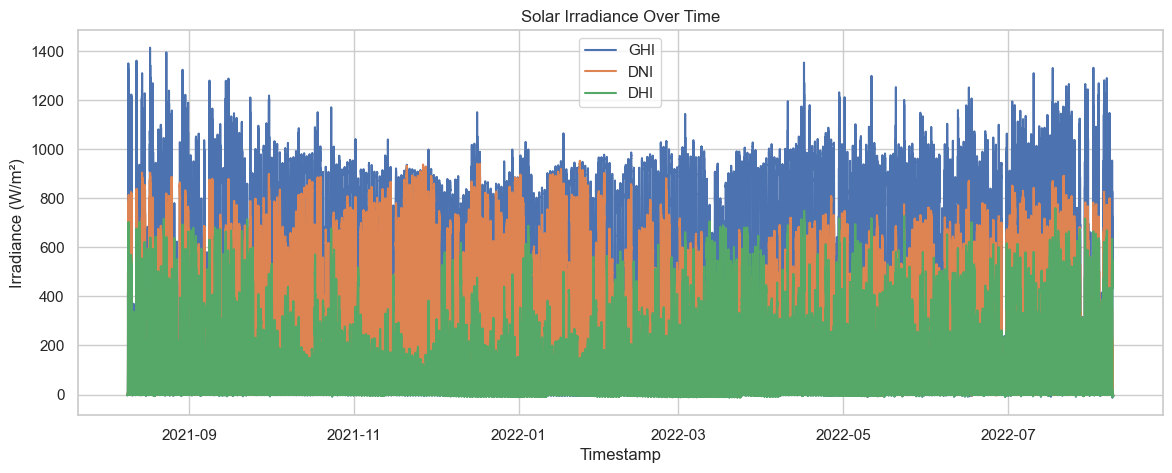

In [7]:
#Time Series Visuals
plt.figure(figsize=(14, 5))
plt.plot(df_cleaned["Timestamp"], df_cleaned["GHI"], label="GHI")
plt.plot(df_cleaned["Timestamp"], df_cleaned["DNI"], label="DNI")
plt.plot(df_cleaned["Timestamp"], df_cleaned["DHI"], label="DHI")
plt.legend()
plt.title("Solar Irradiance Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.show()


<Axes: title={'center': 'Average ModA & ModB by Cleaning'}, xlabel='Cleaning'>

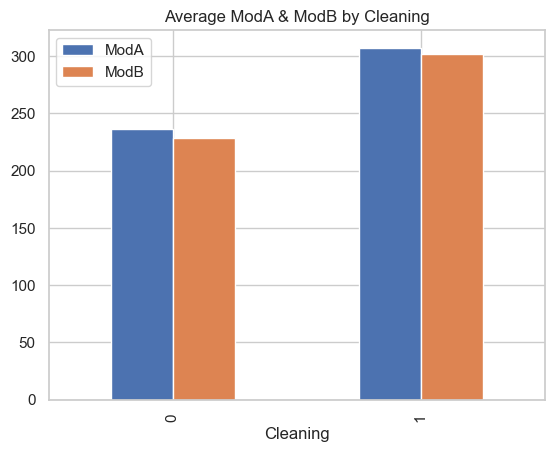

In [8]:
# Cleaning Impact Analysis
mod_avg = df_cleaned.groupby("Cleaning")[["ModA", "ModB"]].mean()
mod_avg.plot(kind="bar", title="Average ModA & ModB by Cleaning")



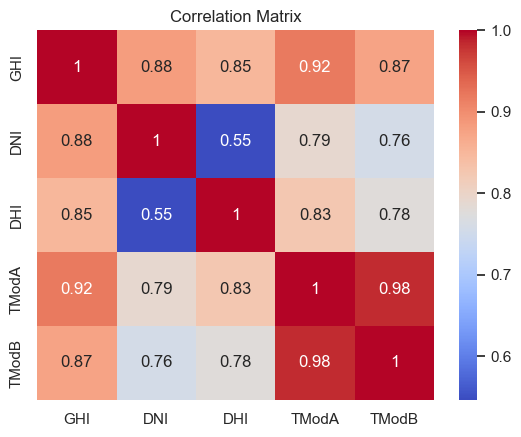

In [9]:
  # Correlation Heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df_cleaned[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


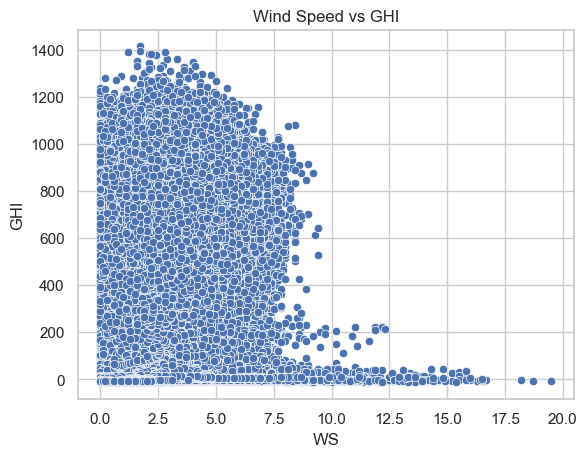

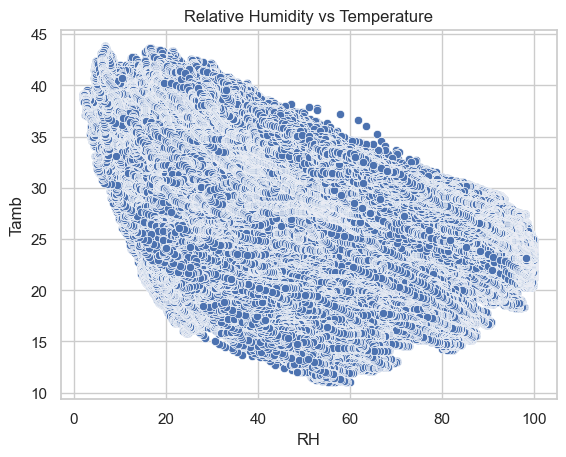

In [10]:
# scater plot
sns.scatterplot(x="WS", y="GHI", data=df_cleaned)
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(x="RH", y="Tamb", data=df_cleaned)
plt.title("Relative Humidity vs Temperature")
plt.show()


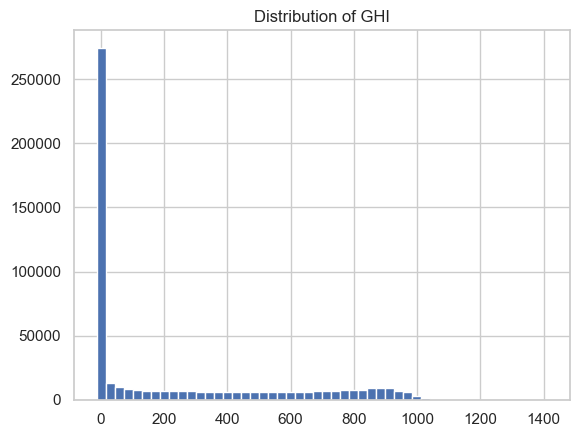

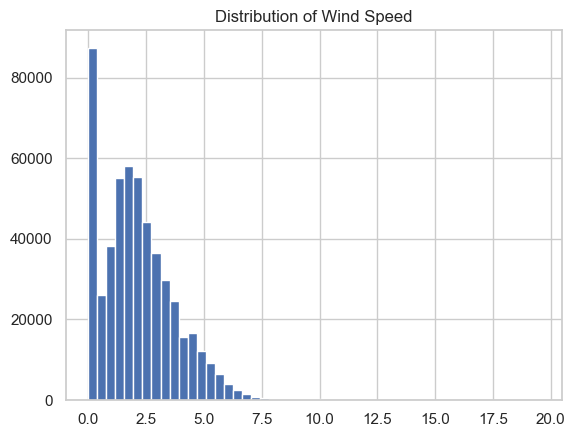

In [11]:
#Histogram
df_cleaned["GHI"].hist(bins=50)
plt.title("Distribution of GHI")
plt.show()

df_cleaned["WS"].hist(bins=50)
plt.title("Distribution of Wind Speed")
plt.show()


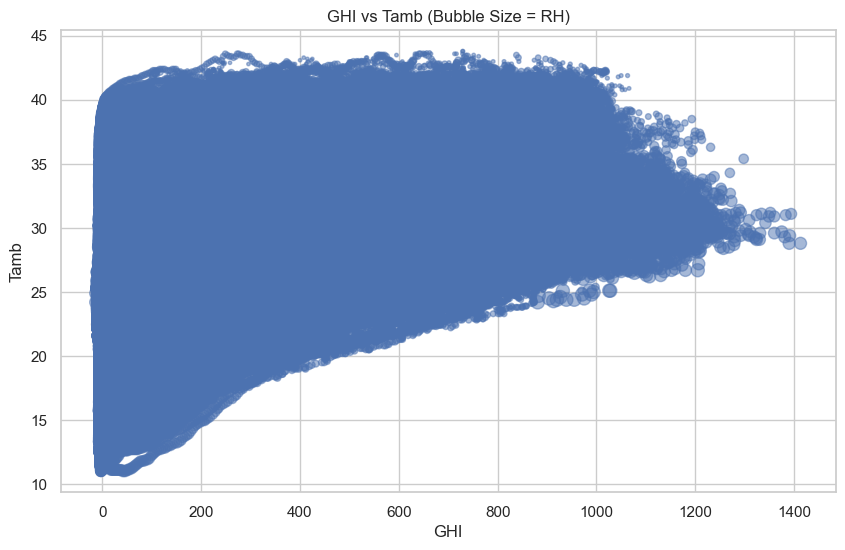

In [12]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["GHI"], df_cleaned["Tamb"], s=df_cleaned["RH"], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.show()
